In [141]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('../data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [88]:
X = df[['PetalLengthCm','PetalWidthCm']].to_numpy()

print(df['Species'].unique())

Label_Dict = {'Iris-setosa': 0 , 'Iris-versicolor' : 1 ,'Iris-virginica' : 2}
df['ClassLabel'] = df['Species'].map(Label_Dict)

y = df['ClassLabel'].values

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### Shuffle Dataset

In [101]:
import random
rnd=np.random.RandomState(123)
shuffled_indices = rnd.permutation(df.shape[0])

X_shuffled, y_shuffled = X[shuffled_indices],y[shuffled_indices]


### Split dataset into test and train

In [127]:
split_train= int(X.shape[0]*0.7)
X_train, y_train = X_shuffled[:split_train], y_shuffled[:split_train]
X_test, y_test = X_shuffled[split_train:], y_shuffled[split_train:]

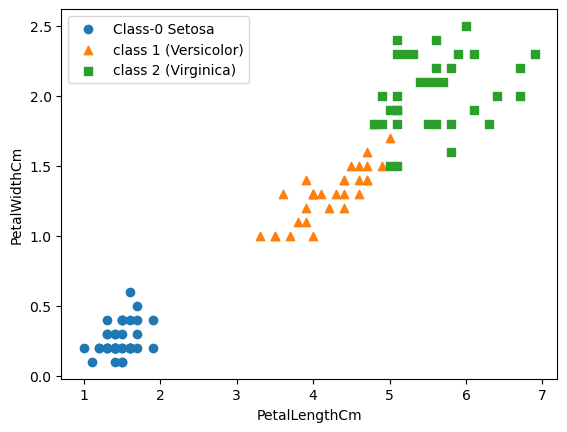

In [170]:
plt.scatter(X_train[y_train==0,0],
            X_train[y_train==0,1],
           marker= 'o',
           label = 'Class-0 Setosa ')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()    
plt.show()

### 1 - NN from scratch

False

In [135]:
X_train[y_train == 0, 0]

array([1.5, 1.3, 1.4, 1.4, 1.3, 1.1, 1.4, 1.4, 1.9, 1.6, 1.7, 1.5, 1.4,
       1.6, 1.4, 1.7, 1.3, 1.2, 1.5, 1.3, 1.7, 1.5, 1.3, 1.5, 1.6, 1.9,
       1.4, 1.6, 1.6, 1.4, 1.2, 1.4, 1.6, 1.6, 1.5, 1.7, 1. , 1.5, 1.5,
       1.3])

In [138]:
X_train[y_train == 0]

array([[1.5, 0.1],
       [1.3, 0.2],
       [1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.1, 0.1],
       [1.4, 0.3],
       [1.4, 0.2],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.7, 0.2],
       [1.5, 0.4],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.3, 0.4],
       [1.2, 0.2],
       [1.5, 0.3],
       [1.3, 0.2],
       [1.7, 0.5],
       [1.5, 0.1],
       [1.3, 0.3],
       [1.5, 0.4],
       [1.6, 0.2],
       [1.9, 0.4],
       [1.4, 0.1],
       [1.6, 0.2],
       [1.6, 0.6],
       [1.4, 0.2],
       [1.2, 0.2],
       [1.4, 0.3],
       [1.6, 0.4],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.7, 0.3],
       [1. , 0.2],
       [1.5, 0.2],
       [1.5, 0.2],
       [1.3, 0.3]])

In [150]:
points =np.array(
[[1,3],
[4,1],
[5,2],])

In [161]:
points[0]

array([1, 3])

In [162]:
points[:,0]

array([1, 4, 5])

In [159]:
points[:,1]

array([3, 1, 2])

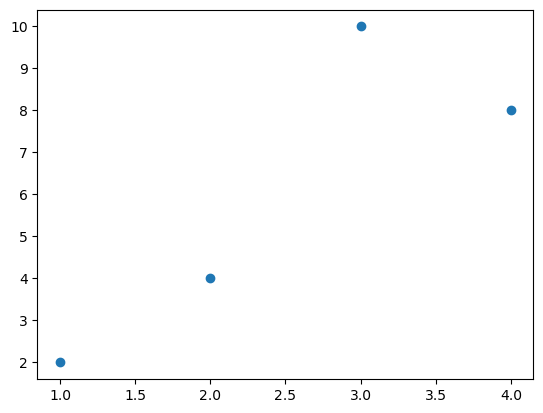

In [156]:
plt.scatter([1,2,3,4],
            [2,4,10,8],
            marker='o',
            label='class 0 (Setosa)')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


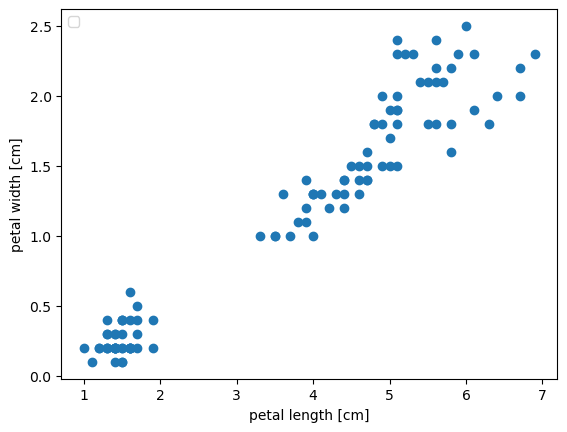

In [164]:
plt.scatter(X_train[:, 0],
            X_train[:, 1],
            marker='o',
          )

# plt.scatter(X_train[y_train == 1, 0],
#             X_train[y_train == 1, 1],
#             marker='^',
#             label='class 1 (Versicolor)')

# plt.scatter(X_train[y_train == 2, 0],
#             X_train[y_train == 2, 1],
#             marker='s',
#             label='class 2 (Virginica)')

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()


In [100]:
shuffled_indices.shape

(150,)

In [26]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [27]:
x=np.array([1,2,3,4,])
y=np.array([3,3,4,5,])

In [28]:
distance(x,y)

2.6457513110645907

In [32]:
df.shape

(150, 6)

In [41]:
df.iloc[permuted_index]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
114,115,5.8,2.8,5.1,2.4,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
135,136,7.7,3.0,6.1,2.3,Iris-virginica
...,...,...,...,...,...,...
131,132,7.9,3.8,6.4,2.0,Iris-virginica
11,12,4.8,3.4,1.6,0.2,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa


In [42]:
df[permuted_index]

KeyError: "None of [Int64Index([ 68, 114, 138, 106, 135,  56,  25, 124,  84,  51,\n            ...\n             38,  26,  37,  47,   1, 131,  11,  80,  44, 149],\n           dtype='int64', length=150)] are in the [columns]"